In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
#end = dt.datetime(2024, 11, 1)
end = dt.datetime.now()

df = yf.download(stock, start, end)

/tmp/ipython-input-2014488804.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385574,35.250700,26.767997,28.908793,855215656
2007-10-08,30.727669,33.480121,30.534513,33.480121,126671715
2007-10-09,32.820171,33.109902,29.085851,30.743759,116725709
2007-10-10,33.125999,33.802041,32.836269,33.673270,67931378
2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [ ]:
df.shape

(4404, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4404 entries, 2007-10-05 to 2025-08-14
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4404 non-null   float64
 1   (High, POWERGRID.NS)    4404 non-null   float64
 2   (Low, POWERGRID.NS)     4404 non-null   float64
 3   (Open, POWERGRID.NS)    4404 non-null   float64
 4   (Volume, POWERGRID.NS)  4404 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 206.4 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4404.000000,4404.000000,4404.000000,4404.000000,4.404000e+03
mean,88.887036,90.028132,87.763246,88.927230,1.192785e+07
std,76.640437,77.529672,75.725493,76.635487,2.019885e+07
min,18.908405,20.212433,16.952364,20.114630,0.000000e+00
25%,36.682773,37.223930,36.173171,36.735325,4.922987e+06
50%,66.237988,67.243019,65.442302,66.238001,8.534480e+06
75%,95.905787,98.557682,94.917506,96.233449,1.377905e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [ ]:
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("powergrid.csv")

In [ ]:
data01 = pd.read_csv("powergrid.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38557434082031,35.2507003581886,26.76799662291043,28.908793360303974,855215656
2,1,2007-10-08,30.72766876220703,33.48012071257007,30.534513396740614,33.48012071257007,126671715
3,2,2007-10-09,32.82017135620117,33.109902182328575,29.085850801739035,30.74375909726689,116725709
4,3,2007-10-10,33.125999450683594,33.80204096867718,32.83626861907928,33.67327001215155,67931378


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.385574,35.250700,26.767997,28.908793,855215656
1,2007-10-08,30.727669,33.480121,30.534513,33.480121,126671715
2,2007-10-09,32.820171,33.109902,29.085851,30.743759,116725709
3,2007-10-10,33.125999,33.802041,32.836269,33.673270,67931378
4,2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


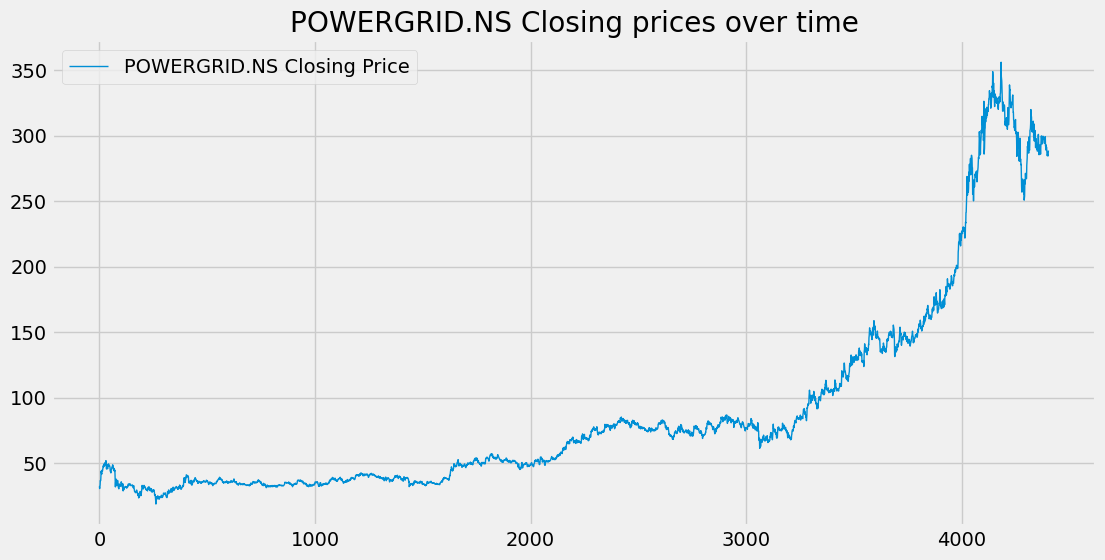

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

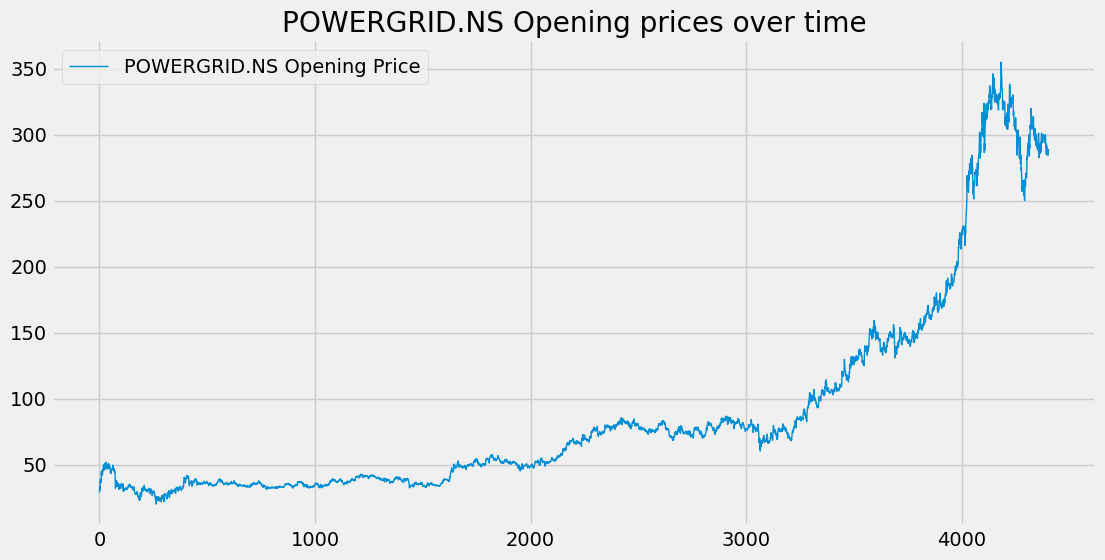

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

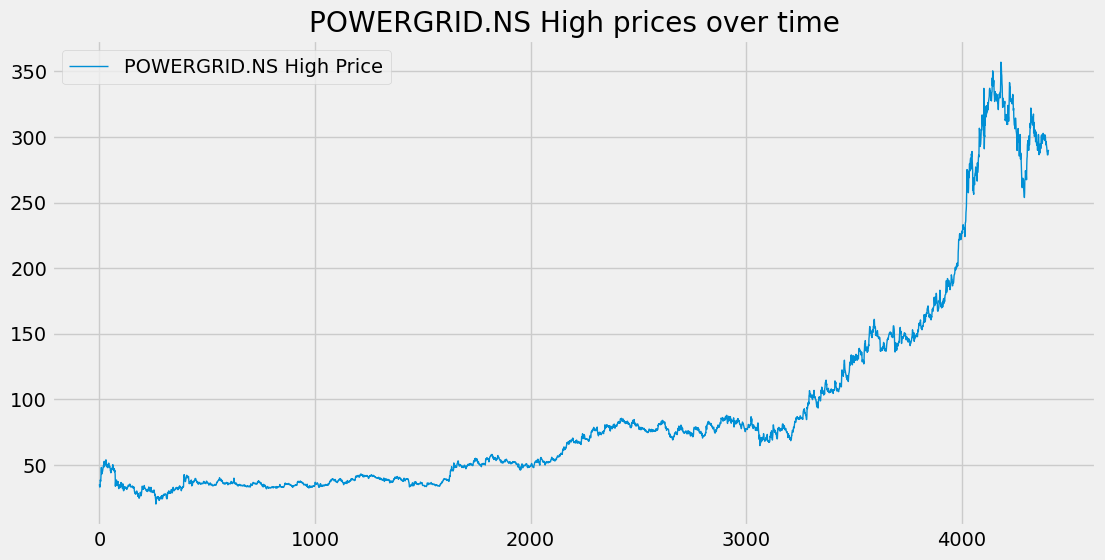

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

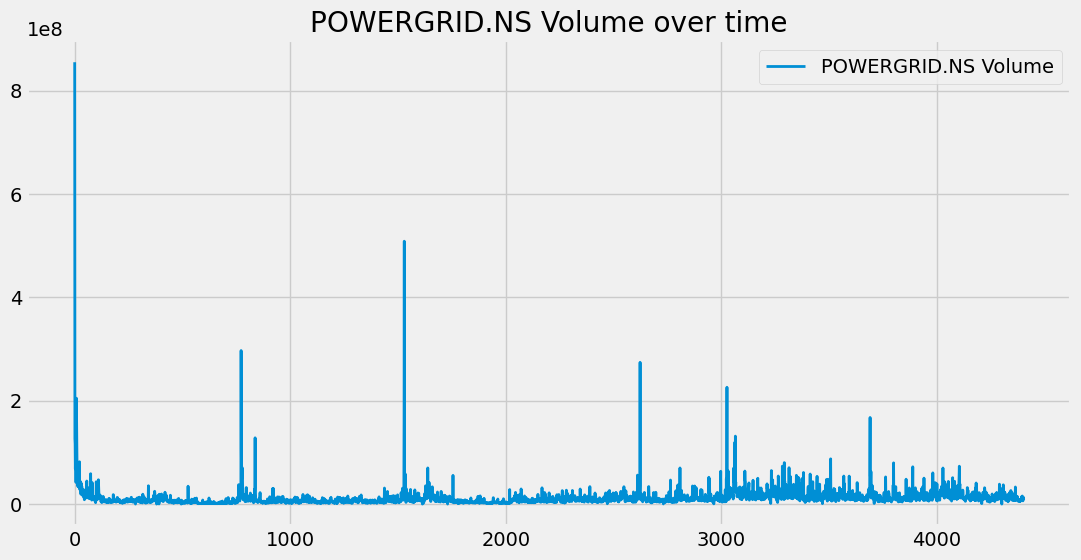

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [ ]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
ma100 = df.Close.rolling(100).mean()

In [ ]:
import pandas as pd

In [ ]:
#pd.set_option('display.max_rows', None)
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4399,295.4045
4400,295.5795
4401,295.7525
4402,295.8625


In [ ]:
ma200 = df.Close.rolling(200).mean()

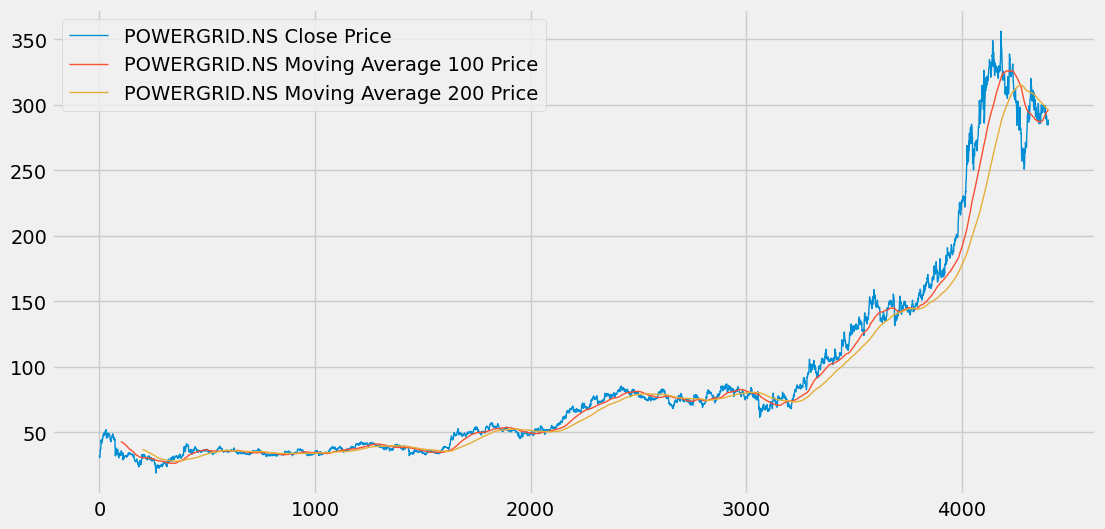

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [ ]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

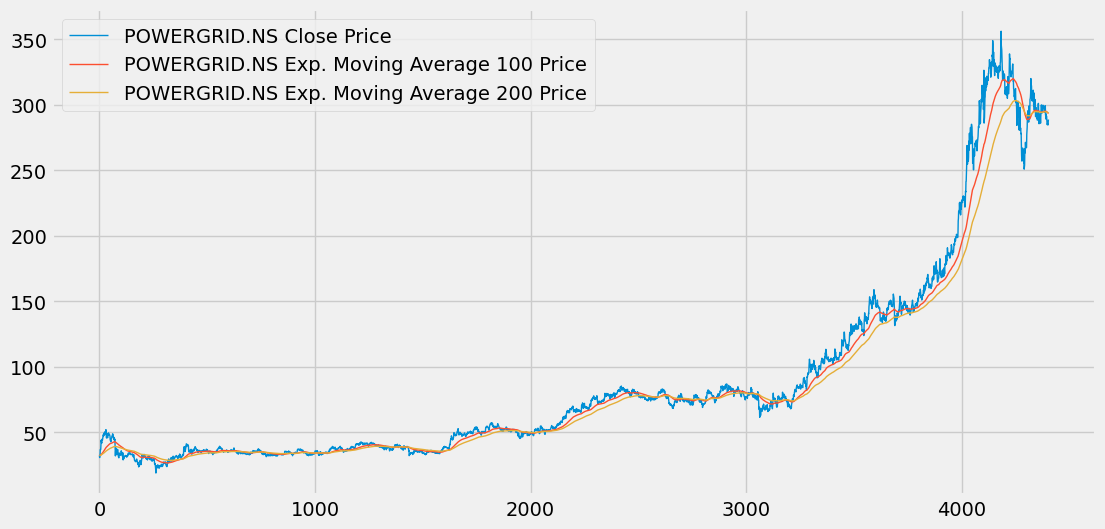

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
data_training.shape

(3082, 1)

In [ ]:
data_testing.shape

(1322, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.19808602],
       [0.17371829],
       [0.20447368],
       ...,
       [0.72174955],
       [0.74587192],
       [0.77312704]])

In [ ]:
data_training_array.shape[0]

3082

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2982, 100, 1)

In [ ]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - loss: 0.0939
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step - loss: 0.0091
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - loss: 0.0078
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 261ms/step - loss: 0.0079
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - loss: 0.0076
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - loss: 0.0056
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - loss: 0.0056
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - loss: 0.0050
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 300ms/step - loss: 0.0050
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - loss: 0.0052
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - loss: 0.0052
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - loss: 0.0047
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - loss: 0.0041
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - loss: 0.0040
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [ ]:
final_df.head()

Ticker,POWERGRID.NS
0,80.709686
1,81.716995
2,81.655334
3,79.928474
4,80.216278


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1322, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step


In [ ]:
y_predicted.shape

(1322, 1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
Train MAE: 0.037248218022303256, Test MAE: 0.05214475924444649, R2: 0.9463891927124847


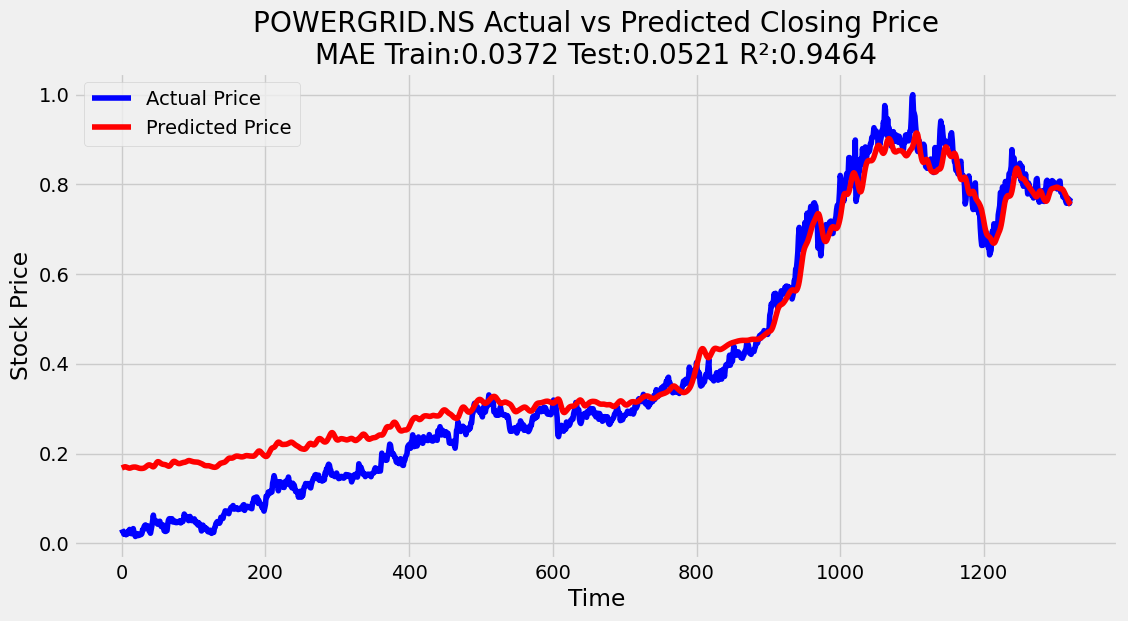

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score     # Extra

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Train MAE: {train_mae}, Test MAE: {test_mae}, R2: {r2}")

plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_test_pred, color='red', label='Predicted Price')
plt.title(f'{stock} Actual vs Predicted Closing Price\nMAE Train:{train_mae:.4f} Test:{test_mae:.4f} R²:{r2:.4f}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on Train & Test
y_train_pred = model.predict(x_train)
y_test_pred  = model.predict(x_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae  = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

if test_mae > train_mae * 2:
    print(" Possible Overfitting detected!")
else:
    print(" No severe overfitting detected.")


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step
Train MAE: 0.037248218022303256
Test MAE: 0.05214475924444649
 No severe overfitting detected.


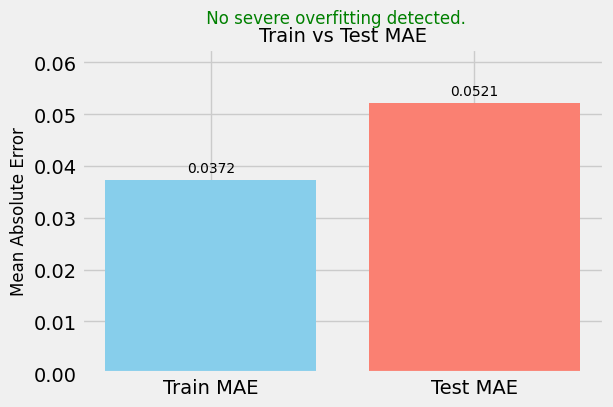

In [ ]:
import matplotlib.pyplot as plt

# Labels and values
labels = ['Train MAE', 'Test MAE']
values = [train_mae, test_mae]
colors = ['skyblue', 'salmon']

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, color=colors)

# Value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001,
             f"{height:.4f}", ha='center', va='bottom', fontsize=10)

# Title & styling
plt.title("Train vs Test MAE", fontsize=14)
plt.ylabel("Mean Absolute Error", fontsize=12)
plt.ylim(0, max(values) * 1.2)

# Overfitting indicator
if test_mae > train_mae * 2:
    plt.suptitle(" Possible Overfitting detected!", color='red', fontsize=12)
else:
    plt.suptitle(" No severe overfitting detected.", color='green', fontsize=12)

plt.show()


In [ ]:
from sklearn.metrics import r2_score

#Assuming y_test and y_pred are your true and predicted values
r2 = r2_score(y_test, y_predicted)
print(f"R-squared score: {r2}")

R-squared score: 0.9463891927124847


In [ ]:
scaler.scale_

array([0.00339369])

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

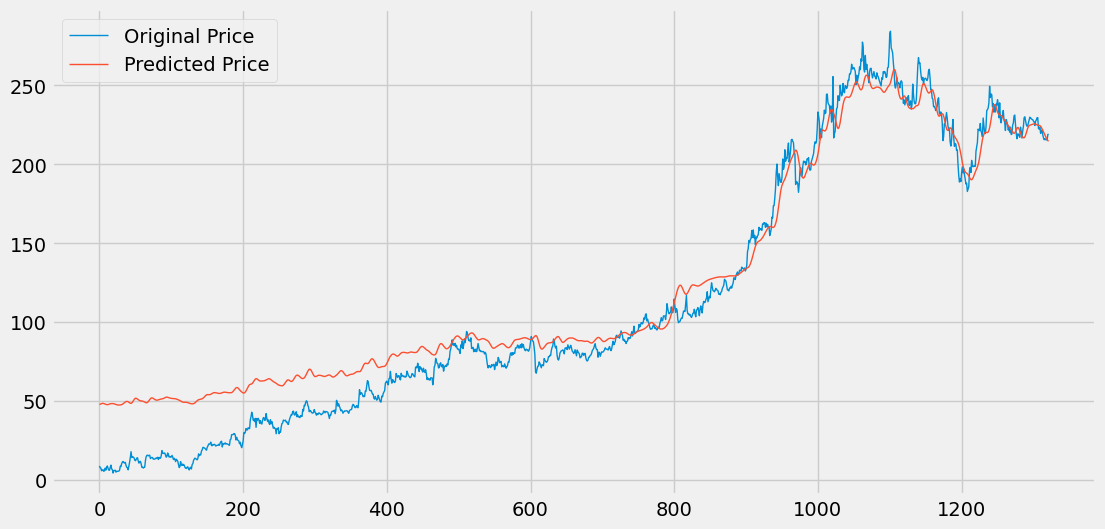

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# Create a date list of the correct length # The date will match the predicted values correctly.
dates = df['Date'][-len(y_predicted):].reset_index(drop=True)

In [ ]:
# Create comparison_df with date
comparison_df = pd.DataFrame(y_test, columns=['Original Price'])
comparison_df['Predicted Price'] = y_predicted.flatten()

In [ ]:
comparison_df['Date'] = dates.values
comparison_df = comparison_df[['Date'] + [col for col in comparison_df.columns if col != 'Date']]

In [ ]:
# Show the resul
#pd.set_option('display.max_rows', None)
print(comparison_df.tail(20))

           Date  Original Price  Predicted Price
1302 2025-07-18      224.567459       225.704865
1303 2025-07-21      227.317853       225.547150
1304 2025-07-22      228.089879       225.256882
1305 2025-07-23      229.489211       224.955200
1306 2025-07-24      229.585722       224.749588
1307 2025-07-25      222.589122       224.711075
1308 2025-07-28      222.396101       224.688156
1309 2025-07-29      223.554170       224.500000
1310 2025-07-30      219.549226       224.089951
1311 2025-07-31      221.527563       223.385468
1312 2025-08-01      221.768825       222.473907
1313 2025-08-04      218.584178       221.498734
1314 2025-08-05      216.702322       220.509476
1315 2025-08-06      215.544252       219.509445
1316 2025-08-07      216.268039       218.491776
1317 2025-08-08      215.592522       217.496582
1318 2025-08-11      215.592522       216.563843
1319 2025-08-12      215.399501       215.735748
1320 2025-08-13      218.825440       215.041962
1321 2025-08-14     

In [ ]:
# Save it in CSV if you want.

#comparison_df.to_csv('multi_feature_prediction_comparison.csv', index=False)

In [ ]:
# Predictions for the future (multi-day)
from datetime import timedelta # Import timedelta
future_days = 3

last_100_scaled = scaler.transform(df['Close'].iloc[-100:].values.reshape(-1, 1))
input_sequence = list(last_100_scaled)
future_predictions = []

for _ in range(future_days):
    current_input = np.array([input_sequence[-100:]])
    predicted_scaled = model.predict(current_input, verbose=0)
    predicted_actual = scaler.inverse_transform(predicted_scaled)

    future_predictions.append(predicted_actual[0])
    input_sequence.append(predicted_scaled[0])  # Added new prediction input


# Create future workday date
last_date = df['Date'].iloc[-1]
future_dates = []
next_date = last_date
while len(future_dates) < future_days:
    next_date += timedelta(days=1) # Now timedelta is defined
    if next_date.weekday() < 5:  # Skip Saturday/Sunday
        future_dates.append(next_date)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [ ]:
# Result DataFrame
multi_day_df = pd.DataFrame(future_predictions)
multi_day_df.insert(0, 'Date', future_dates)

# Show results
print("Prediction for the next 3 days (including dates):")
print(multi_day_df)

# Save it in CSV if you want.
# multi_day_df.to_csv("future_stock_predictions.csv", index=False)

Prediction for the next 3 days (including dates):
        Date           0
0 2025-08-15  283.652496
1 2025-08-18  283.689392
2 2025-08-19  283.781036


In [ ]:
import plotly.graph_objects as go
# Future prediction visualization
fig = go.Figure()

# Plotting the predicted prices
fig.add_trace(go.Scatter(x=multi_day_df['Date'], y=multi_day_df[0],
                         mode='lines+markers',
                         name='Predicted Price'))

fig.update_layout(title= 'Future (Next 30 Days) Stock Prediction',
                  xaxis_title='Date',
                  yaxis_title='Predicted value',
                  template='plotly_dark')

fig.show()

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt



def predict_future_prices(future_days):
    # Get last 100 days of scaled closing prices
    last_100_scaled = scaler.transform(df['Close'].iloc[-100:].values.reshape(-1, 1))
    input_sequence = list(last_100_scaled)
    future_predictions = []

    # Generate predictions
    for _ in range(future_days):
        current_input = np.array([input_sequence[-100:]])
        predicted_scaled = model.predict(current_input, verbose=0)
        predicted_actual = scaler.inverse_transform(predicted_scaled)

        future_predictions.append(predicted_actual[0])
        input_sequence.append(predicted_scaled[0])

    # Generate future business dates (weekdays only)
    last_date = df['Date'].iloc[-1]
    future_dates = []
    next_date = last_date
    while len(future_dates) < future_days:
        next_date += timedelta(days=1)
        if next_date.weekday() < 5:  # Monday to Friday
            future_dates.append(next_date)

    # Create prediction DataFrame
    pred_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted Price': [p[0] for p in future_predictions]
    })

    # Plot predictions
    plt.figure(figsize=(10, 4))
    plt.plot(pred_df['Date'], pred_df['Predicted Price'], marker='o', color='blue')
    plt.title(f'Stock Price Prediction for Next {future_days} Business Days')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    return pred_df, plt

# --- Gradio Interface ---
demo = gr.Interface(
    fn=predict_future_prices,
    inputs=[
        gr.Slider(minimum=1, maximum=60, step=1, value=30, label="Number of Future Business Days")
    ],
    outputs=[
        gr.Dataframe(label="Predicted Prices"),
        gr.Plot(label="Prediction Chart")
    ],
    title="Stock Price Forecasting Tool",
    description="Enter the number of future business days to predict stock prices using a trained model."
)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7a10c17da3cb20c44e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
model.save('model.h5')

In [ ]:
#from google.colab import files
#files.download("model.h5")


In [ ]:
final_df.head()

Ticker,POWERGRID.NS
0,80.709686
1,81.716995
2,81.655334
3,79.928474
4,80.216278
